Title : Data Cleansing for APP Training

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Memuat DataSets

In [2]:
df = pd.read_csv("C:/Users/ASUS/JupyterNotebookFile/RaHciFinaltask/credit_card_balance.csv") # load dataset dari direktori file laptop

In [3]:
df.head() #menampilkan 5 data teratas

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


# Exploratory Data Analysis (EDA)

Disini kita pakai **pd.set_option('display.max_columns', None)** untuk menunjukkan semua kolom yang terdapat pada dataset

In [4]:
pd.set_option('display.max_columns', None) #meanmpilkan semua kolom pada data
display(df.head(5)) # 5 data teratas menggunakan display agar tetap bisa ditampilkan, karena line berikutnya mengeksekusi perintah print
print(f'Ukuran dari dataset (baris, kolom) : {df.shape}')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


Ukuran dari dataset (baris, kolom) : (3840312, 23)


## Tipe Data pada DataSet

In [5]:
df.info() #menampilkan tipe dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

Dari sini kita bisa tahu bahwa terdapat 65 kolom bertipe Float, tipe int ada 41 dan objet 16

Dari hal ini untuk menampilkan deskriptif statistiknya ada 2 janis, yaitu yang enampilkan untuk tipe numerik dan obej

### Deskriptif statistik Numerik

In [6]:
df.describe() #ini untuk numerical

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


### Deskriptif Statistik Kategorial

In [7]:
tipe_data_kategorial = df.select_dtypes(include='object') #memilih tipe data objek
tipe_data_kategorial.describe()

,NAME_CONTRACT_STATUS
count,3840312
unique,7
top,Active
freq,3698436


# Data Cleansing

## Mengecek Nilai Duplikasi

In [8]:
df.duplicated().sum() #mennjumlahkan data yang memiliki nilai duplikasi

0

Dari pengecekan nilai duplikasi diatas, menunjukkan bahawa tidak ada data yang duplikasi, Selanjutkan kita lanjutkan untuk pengecekan Missing Value

## Missing Value

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def pengecekan(data):
    pd.set_option('display.max_rows', None)
    missing_values = data.isna().sum()
    missing_columns = missing_values[missing_values > 0]
    if not missing_columns.empty:
        persentase = missing_columns / len(data) * 100
        print(f'Kolom dengan Missing Value :')
        missing_info = pd.DataFrame({'Missing Values': missing_columns, 'Persentase': persentase})
        missing_info = missing_info.sort_values(by='Missing Values', ascending=False)
        missing_info.info()
        
        # Visualisasi
        plt.figure(figsize=(12, 9))
        colors = []
        for persen in missing_info['Persentase']:
            if persen > 51:
                colors.append('#E1341E')  # Merah
            elif persen > 41:
                colors.append('#FFA500')  # Orange
            elif persen > 21:
                colors.append('#FFFF00')  # Kuning
            else:
                colors.append('#2CA02C')  # Hijau
        ax = sns.barplot(x='Persentase', y=missing_info.index, data=missing_info, palette=colors)

        for p in ax.patches:
            ax.annotate("%.2f" % p.get_width() + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2),
                        xytext=(8, 0), textcoords='offset points', ha="left", va="center", fontsize=10)

        plt.title('Persentase Missing Value untuk Setiap Kolom', fontsize=10)
        plt.xlabel('Persentase Missing Value', fontsize=12)
        plt.ylabel('Nama_kolom', fontsize=12)
        
        # Menambahkan legenda
        legend_labels = ['> 51%', '31% - 51%', '21% - 31%', '< 21%']
        legend_colors = ['#E1341E', '#FFA500', '#FFFF00', '#2CA02C']
        patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='none') for color in legend_colors]
        plt.legend(patches, legend_labels, loc='lower right')
        
        plt.tight_layout()
        plt.xlim(0, 100)
        plt.show()
        
    else:
        print("Tidak ada kolom dengan Missing Value.")

Kolom dengan Missing Value :
<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, AMT_PAYMENT_CURRENT to CNT_INSTALMENT_MATURE_CUM
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Missing Values  9 non-null      int64  
 1   Persentase      9 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 216.0+ bytes


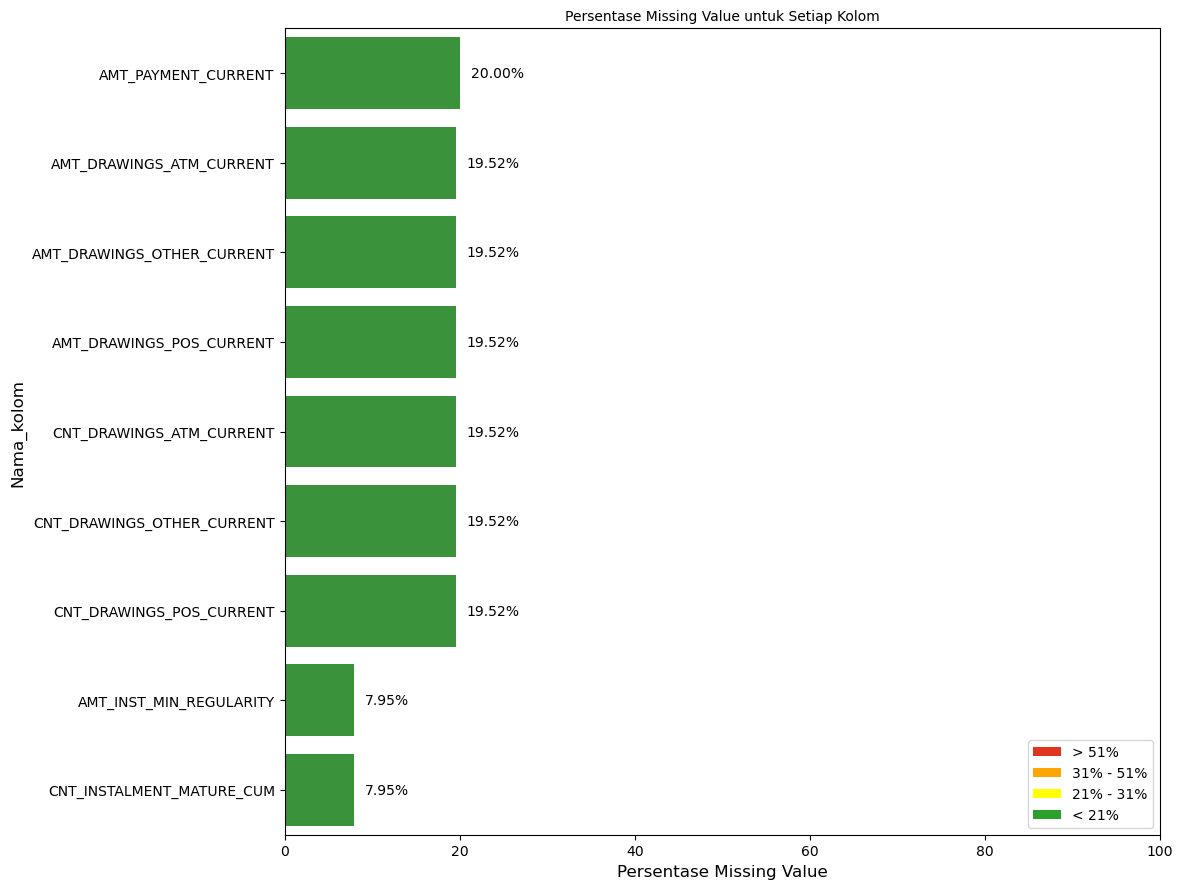

In [10]:
pengecekan(df)

Hasil diatas menunjukkan bahwa, hampir dari separuh data memiliki nilai hilang yang melebihi 50%. Untuk keputusan saya ini, saya mengamil tindakan untuk mengapus kolom yang memliki nilai missing value diatas 45%. Karena jika kita isi dengan nilai 0 atau mean, kemungkinan besar hasilnya akan tidak akurat dan bisa bikin data jadi kelihatan janggal

# Menghapus Kolom Diatas 45%

In [11]:
# Menghitung persentase missing value untuk setiap kolom
persentase_missing = (df.isnull().sum() / len(df)) * 100

# Membuat list nama kolom yang akan dihapus
kolom_hapus = persentase_missing[persentase_missing > 45].index.tolist()

# Menghapus kolom dari dataset
data_credit_card_balance_clean = df.drop(columns=kolom_hapus)

In [12]:
data_credit_card_balance_clean.shape

(3840312, 23)

In [13]:
data_credit_card_balance_clean.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


# Mengisi Missing Value 

Kolom dengan Missing Value :
<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, AMT_PAYMENT_CURRENT to CNT_INSTALMENT_MATURE_CUM
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Missing Values  9 non-null      int64  
 1   Persentase      9 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 216.0+ bytes


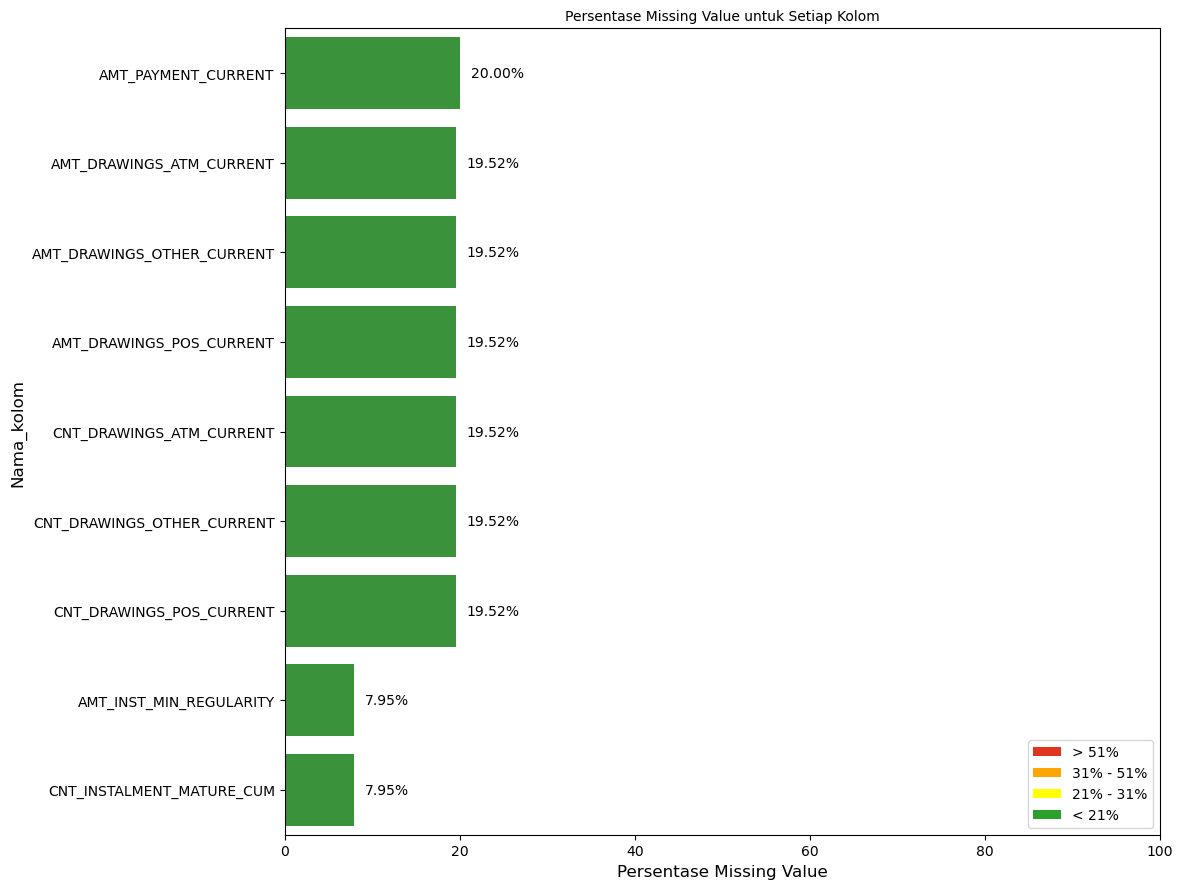

In [14]:
pengecekan(data_credit_card_balance_clean)

In [16]:
def isi_missing_value(data):
    # Mengisi nilai missing value untuk kolom numerik dengan rata-rata
    for kolom in data.select_dtypes(include='number').columns:
        mean_value = data[kolom].mean()
        data[kolom].fillna(mean_value, inplace=True)

    # Mengisi nilai missing value untuk kolom objek dengan mode
    for kolom in data.select_dtypes(include='object').columns:
        mode_value = data[kolom].mode()[0]
        data[kolom].fillna(mode_value, inplace=True)

    return data

# Contoh penggunaan:
data_clean = isi_missing_value(data_credit_card_balance_clean)

In [17]:
pengecekan(data_credit_card_balance_clean)

Tidak ada kolom dengan Missing Value.


# Menyimpan Data

In [18]:
data_clean.to_csv('data_clean_credit_card_balance.csv', index=False)